# 模板匹配

模板匹配是指在当前图像A内寻找与图像B最相似的部分，一般将图像A称为输入图像，将图像B称为模板图像。模板匹配的操作方法是将模板图像B在图像A上滑动，遍历所有像素以完成匹配。

在OpenCV内，模板匹配是使用函数cv2.matchTemplate()实现的。

这里需要注意的是，函数cv2.matchTemplate()通过参数method来决定使用不同的查找方法。对于不同的查找方法，返回值result具有不同的含义。

在查找最佳匹配时，首先要确定使用的是何种method，然后再确定到底是查找最大值，还是查找最小值。

查找最值（极值）与最值所在的位置，可以使用cv2.minMaxLoc()函数实现。

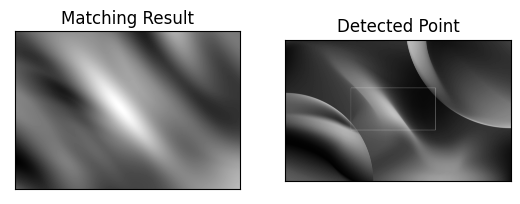

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('images/color.jpg',0)
template = cv2.imread('images/color_cmp.jpg',0)
tw, th = template.shape[::-1]
rv = cv2.matchTemplate(img, template, cv2.TM_CCOEFF)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(rv)
topLeft = maxLoc
bottomRight = (topLeft[0] + tw, topLeft[1] + th)
cv2.rectangle(img, topLeft, bottomRight, 255, 2)
plt.subplot(121), plt.imshow(rv, cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img, cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

# 多模板匹配

有些情况下，要搜索的模板图像很可能在输入图像内出现了多次，这时就需要找出多个匹配结果。而函数cv2.minMaxLoc()仅仅能够找出最值，无法给出所有匹配区域的位置信息。所以，要想匹配多个结果，使用函数cv2.minMaxLoc()是无法实现的，需要利用阈值进行处理。

其他的用到再看。